Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Usama Puri"
COLLABORATORS = ""

---


# CS110 Fall 2019 - Assignment 3
# Decoding relationships between genes

## Submission Materials
Your assignment submission needs to include the following resources:

1. A PDF file must be the first resource and it will include all the answers to the questions above. 
2. Name the  PDF file: `<your_ name>.pdf`. For example, if you are a student name Dumbledore, your PDF file must be named “Dumbledore.pdf”. 
3. Make sure that you submit a neat, clearly presented, and easy-to-read PDF,  
4. Your PDF **must also** include the Python code as an appendix at the end. This will facilitate the process of writing feedback by anchoring the feedback to specific portions of the Python code using the grader tool.
5. Your second resource must be a single Python/Jupyter Notebook with your answers written in the assignment template provided.
    * Name this Jupyter Notebook also using the same convention as for the PDF file;  <student_name>.ipynb. For example, if you’re Dumbledore, your  Jupyter Notebook must be named “Dumbledore.ipynb”. 

## Notes on Grading Rubrics
* This is a strictly individual assignment. Everything you submit must reflect your own writing both in the text and Python programming.
* The assignment will be graded on the quality of your report, as well as: 
    * the LOs tagged in each question. 
    * the HCs **#professionalism** and **#algorithms** based on a holistic view of the assignment.

Please consult the rubrics for these LOs to optimally align your approach to the rubrics.
* As per the course’s policy on the syllabus, you will need to footnote at least **three** HCs by including a meaningful justification of the application of each HC. 
You will need to mindfully address how the HC enabled you to complete part of your work on this assignment. Please refer to refer to [these guidelines](https://docs.google.com/document/d/1s7yOVOtMIaHQdKLeRmZbq1gRqwJKfezBsfru9Q6PcHw/edit) on how to incorporate HCs in your work.
* You will receive a warning on the first two weak applications of the HCs used in assignments since the beginning of the course. The counting system is cumulative, and these first two warnings will not generate a grade on the HC. The third and subsequent warnings will be graded on the specific HC using the HCs corresponding rubric. Please check what your HC counter is and prepare accordingly for this assignment.


## Overview
Gene Mutation is a prevailing and computationally intensive research topic in Genetics. For this assignment, assume that you have been hired by a biotechnology company to work on a gene mutation research project, and your first task is to write a Python program to investigate a genealogical mutation sequencing.


In this program, a gene is described by a string of letters, with a letter being chosen from the set ${A, C, G, T}$. A mutation is relatively rare but it can occur in which there is a small probability of either inserting a new character, deleting an existing character, or changing to a new character randomly. We can refer to these probabilities by $p_i, p_d$, and $p_c$, respectively.


Now, suppose the starting point is a given string that undergoes a mutation process. This mutation created two other strings, the child strings of the first string. Each of these two new strings can undergo mutations by which they will change from their parent. In turn, the two-child strings, mutate and create 2 new substrings each, resulting in four grandchild strings from the original gene sequencing string. We can easily visualize the sequence of mutations if we were to draw a genealogy binary tree relating strings to their parent and grandparent strings.

As a result of these mutations, we now have 7 strings but unfortunately, the order of the strings has been lost due to a glitch in the gene sequencing generation program. Therefore, your first task in the project is to recover the genealogy tree for the following set of 7 strings labelled with lowercase letters:


`('a','ACAATCCTCGCGCAGAACAACACTTTTAACGTATCCTTGATCATTTTCCGTCCTAAGTCGAATT')`,
`('b','CATCGCAAGCCAGCCTAATGACCGATCTCGGGTGTACTAATGGATCGTATCTCCACTCTTACACTGTCGTATTG')`,
`('c','TCCCAGGCACTGCGACAGAAACGAGAGCGGTTTTTGACGATGGCATTCATCGATTTTCCCCCCCCTACTGATACAAACAGT')`,
`('d','AAGCGTAATGCTGGGTAGGGAGCAAACAGGTCAAGCGGACTTGTAACCATTTTTCCCACTAAGAAGTCGCATATA')`,
`('e','GCGTCCGCAACGTTGGGCTTCAAACGTACCGAGTTTCCGATGGATTATATTGGACAGATGATCCTACCAAGTGCCTTTTCTAACAGCTCGGTAATGTC')`,
`('f','ACAGACTGCGGAAGCGCGACGCTTGATTTCGGCAGCCCCACGGATGGTACATAACTGCTGTTACCTACGCTACCTGCTAAACACTTCCCGCTCTG')`,
`('g','ACGAGCAGCCACAGCACACCGTTAACTATGTGATAATCCCTCATGCGATG')`

Henceforth, the set of strings created with the gene-sequencing generation program will be referred to as `Set_Strings`.

# Assignment Questions

Each of the questions below will be graded on the CS110 LOs included inside square brackets: 

## Part A [#responsibility] [appropriate LO for the make-up work] 

Take a screenshot of your CS110 dashboard on Forum where the following is visible:
* your name.
* your absences for the course have been set to excused up to session 12.2 (inclusively).

Submit this screenshot as a PNG file on your Python or Jupyter notebook. 


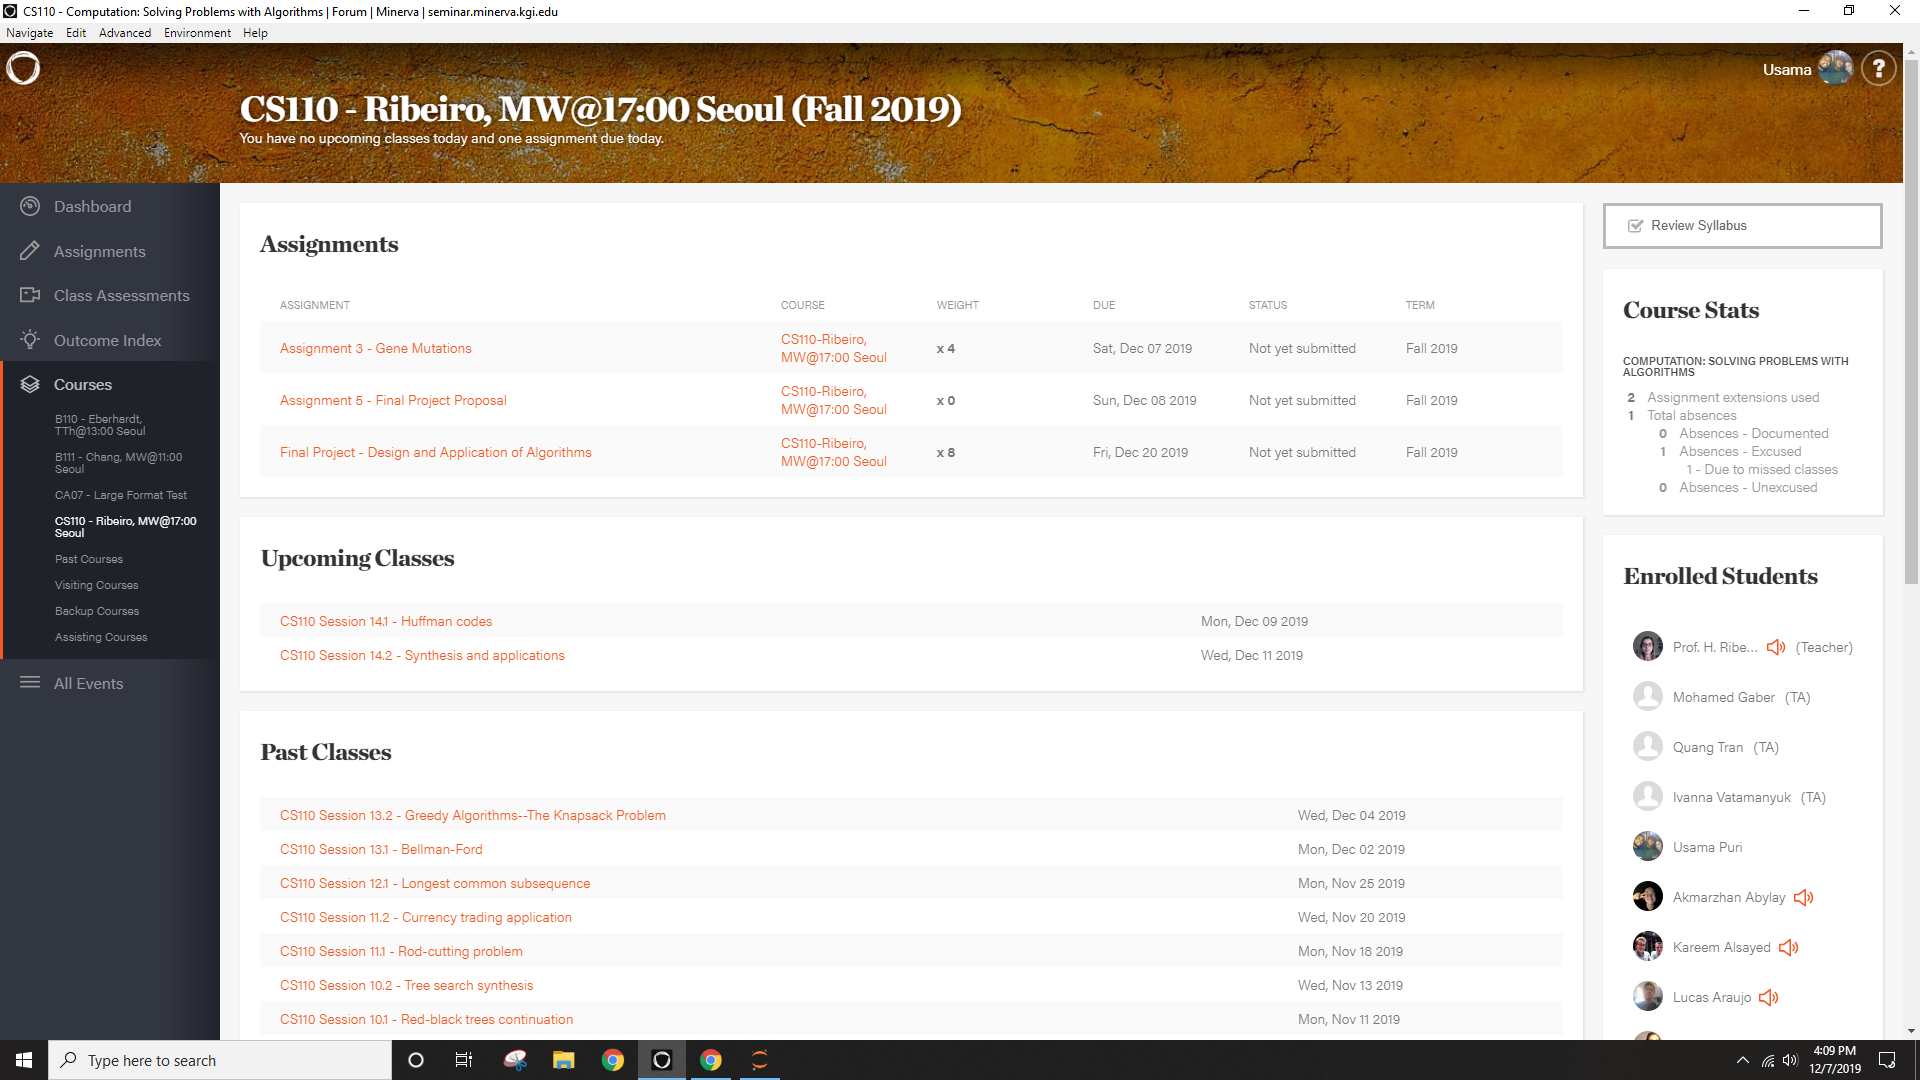

In [2]:
from IPython.display import Image
Image("Screenshot.png")

## Part B. Consider `Set_Strings` to answer the following questions below:

### Question 1. [#DynamicProgramming, #PythonProgramming, #CodeReadability] 

Write Python code which, given any two arbitrary strings, outputs the length of the Longest Common Subsequence (LCS) for those two strings. Make sure to include a number of test cases that demonstrate that your code is correct.


In [3]:
import numpy as np
def longestCommonSubsequence(x, y, output='length'):
    """
    Gives the length of the longest common substring between strings x and y
    
    Inputs:
    - x, y: strings
    """
    # Initialize the matrix
    x_size, y_size = len(x), len(y) #Determining the lengths of the string
    table = np.zeros((x_size, y_size)) #creating a matrix with all zero values so that
                                   #we can save the values in that matrix
    
    # Base case. If the first char is the
    # same, the size of te LCS is at least 1.
    if x[0] == y[0]:
        table[0, 0] = 1
    
    # Initialize the first column. Find
    # the left-most char in x that 
    # matches the first char of y.
    for i in range(1, x_size):
        if table[i - 1, 0]:  # if > 0
            table[i, 0] = 1
        else:
            if x[i] == y[0]:
                table[i, 0] = 1
    
    # Initialize the first row by
    # following an equivalent procedure.
    for j in range(1, y_size):
        if table[0, j - 1]:  # if > 0
            table[0, j] = 1
        else:
            if x[0] == y[j]:
                table[0, j] = 1
    
    # For the remainder of the table,
    # apply the optimal substructure
    # of the problem.
    for i in range(1, x_size):
        for j in range(1, y_size):
            if x[i] == y[j]:
                table[i, j] = table[i - 1, j - 1] + 1
            elif table[i - 1, j] >= table[i, j - 1]:
                table[i, j] = table[i - 1, j]
            else: 
                table[i, j] = table[i, j - 1]
    return int(table[-1, -1])
    
    #These conditions below ask which desired output is needed in the question
    #In this question we only need length 
    #But in the following questions we will use this Algorithm with output as a table
    if output == "length":
        return int(r[-1, -1])
    if output == "table":
        return r

print (longestCommonSubsequence("abcbdab", "bdcaba"))

4


In [4]:
assert(longestCommonSubsequence('ABCBDAB', 'BDCABA')==4)

### Question 2. [#DynamicProgramming] 

How many LCSs are there in Set_Strings? Generate the matrix of the lengths of the LCS for every pair of strings in Set_Strings. The matrix should be cast as a two-dimensional numpy array. **Store this 2D numpy array to a variable named `C`**.

Your 2D array `C` should have dimension (7,7) and `C[i,j]` should give the length of the LCS for the $i-$th and $j-$th strings. For example, `C[0,3]` gives the length of the LCS for string `a` and string `d`.

In [5]:
import pandas as pd

Set_Strings = [('a','ACAATCCTCGCGCAGAACAACACTTTTAACGTATCCTTGATCATTTTCCGTCCTAAGTCGAATT'), 
        ('b','CATCGCAAGCCAGCCTAATGACCGATCTCGGGTGTACTAATGGATCGTATCTCCACTCTTACACTGTCGTATTG'), 
        ('c','TCCCAGGCACTGCGACAGAAACGAGAGCGGTTTTTGACGATGGCATTCATCGATTTTCCCCCCCCTACTGATACAAACAGT'), 
        ('d','AAGCGTAATGCTGGGTAGGGAGCAAACAGGTCAAGCGGACTTGTAACCATTTTTCCCACTAAGAAGTCGCATATA'), 
        ('e','GCGTCCGCAACGTTGGGCTTCAAACGTACCGAGTTTCCGATGGATTATATTGGACAGATGATCCTACCAAGTGCCTTTTCTAACAGCTCGGTAATGTC'), 
        ('f','ACAGACTGCGGAAGCGCGACGCTTGATTTCGGCAGCCCCACGGATGGTACATAACTGCTGTTACCTACGCTACCTGCTAAACACTTCCCGCTCTG'), 
        ('g','ACGAGCAGCCACAGCACACCGTTAACTATGTGATAATCCCTCATGCGATG')]

len_Set_Strings = len(Set_Strings)
dists = []

for i in range(len_Set_Strings):
    dists.append([])
    for j in range(len_Set_Strings):
        lcs_len = longestCommonSubsequence(Set_Strings[i][1], Set_Strings[j][1])
        dists[i].append(lcs_len)       
print(dists)


dists_dct = {}
for i in range(len(dists)):
    dists_dct[i] = dists[i]
df = pd.DataFrame(dists_dct)
df


[[64, 45, 49, 48, 50, 48, 38], [45, 74, 47, 46, 59, 58, 45], [49, 47, 81, 48, 57, 57, 39], [48, 46, 48, 75, 53, 54, 38], [50, 59, 57, 53, 98, 61, 43], [48, 58, 57, 54, 61, 95, 45], [38, 45, 39, 38, 43, 45, 50]]


,0,1,2,3,4,5,6
0,64,45,49,48,50,48,38
1,45,74,47,46,59,58,45
2,49,47,81,48,57,57,39
3,48,46,48,75,53,54,38
4,50,59,57,53,98,61,43
5,48,58,57,54,61,95,45
6,38,45,39,38,43,45,50


The above Table represents the lengths of common subsequences (LCS) of all sequence pairs. Main diagonal (up left to down right) contains the lengths of original sequences, since they are LCS of the same string. Here, we are interested in using the length of the longest common subsequence as a measure of the similarity of strings. Given that the length of our seven genes varies, the absolute length of the LCS might be misleading and compairing these numbers might be irrelevant, so instead we can take a look at what percentage of the bases is retained in all pairs of sequences (by dividing by the actual sequence length). Below You can see the exact same table but the values have been changed into percentages and now this standardized table can be used to determine the genealogical relationships between strings for the next question

In [6]:
percentage_dct = {}
for i in range(len(dists)):
    percentage_dct[i] = list(map(lambda elem: elem / max(dists[i]), dists[i]))

df = pd.DataFrame(percentage_dct)
df

,0,1,2,3,4,5,6
0,1.000000,0.608108,0.604938,0.640000,0.510204,0.505263,0.76
1,0.703125,1.000000,0.580247,0.613333,0.602041,0.610526,0.90
2,0.765625,0.635135,1.000000,0.640000,0.581633,0.600000,0.78
3,0.750000,0.621622,0.592593,1.000000,0.540816,0.568421,0.76
4,0.781250,0.797297,0.703704,0.706667,1.000000,0.642105,0.86
5,0.750000,0.783784,0.703704,0.720000,0.622449,1.000000,0.90
6,0.593750,0.608108,0.481481,0.506667,0.438776,0.473684,1.00


In [7]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

### Question 3. [#DataStructures]

Manually examine the matrix you obtained in 2, and infer the genealogical relationships between strings (i.e., explicitly identify the great-grandparent, grandparent, parent and child strings), and draw the resulting genealogy binary tree associated with `Set_Strings`.


So to find the the genealogical tree, we will look back at the similarities between the genes and compare them. However, to be able to compare two genes, we need to know how similar they are. And to find these similarities we used the Longest Common Subsequence (LCS) algorithm, which we discussed above. This LCS algorithm takes into account insertion and deletion while comparing two genes. This means that it checks how many additional/missing elements are there for one gene to become another. Trivially, we can see in the above table that when i = j, the share is equal to one. When the pair is composed of two copies of the same string, the LCS is the string itself. That's why in the above table where we calculated the number of commonalities in the strings, we can see that the table is commutative i.e. the number of common elements between i and j are same no matter which string is considered first. Although the percentage matrix is not symmetrical but it is just because the length of the base string on which others is calculated varies. 

Now, before proceeding with the numerical analysis, let us establish a few thoughts given what we know about the set of genes.
We know that there is one parent gene, two child genes, and four grandchild genes (two for each child gene). Therefore, there are three parent-child relationships (and a total of 6 edges); one from the parent to the two children, and two from one child to two grandchildren. High shares of "LCS-fraction should characterize these relationships". Moreover, we should expect the lowest share of LCS-fraction to be observed when comparing 2nd-degree cousins, given that they form the most distant relationship. Equipped with these guidelines, we may infer the relationship between the genes in our pool.

After getting the fractional table, we can start going through all the genes (column by column) and identify the ones that are more related, which indeed would have the highest fractional value. Besides, we will ignore all the diagonal 1’s, as it is the gene itself. Indeed, we can identify that string 6 has a relatively high level of LCS-fraction to all other genes: This means that this string is more related to the other strings and is common in their tree. Furthermore, we see that the lowest share of LCS-fraction occurs between strings 3 and 2. 

With this information, we may attempt to reverse engineer the relationship among genes. The main problem is to differentiate between parent-child and child-grandchild relationships. We may hypothesize that the similarity between a parent and a grandchild would be higher than the one between a child and a nephew/niece (i.e., a non-direct grandchild). If that is the case, the of LCS-fraction of the parent should be higher than that of its parent.

Next, we can test whether applying our knowledge of the lowest LCS-fraction share can aid us in telling the three candidates apart. If strings 3 and 2 are 2nd-degree cousins, they do not share a parent. If we assume their parent to be the string with which they have the highest LCS-fraction (hopefully, a reasonable assumption), we may be able to differentiate among the three available choices. So based on these inductions I came up with the binary tree that is printed below

The inferred relationship among the genes.


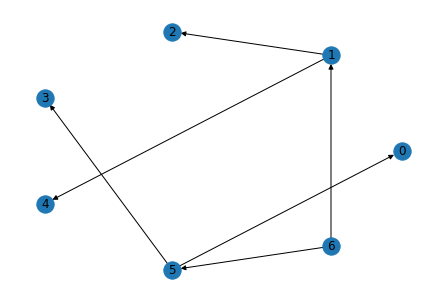

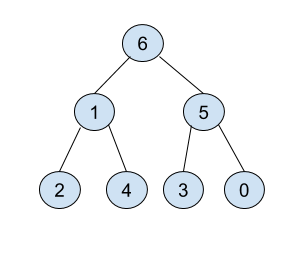

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
G = nx.DiGraph()

for i in range(7):
    G.add_node(i)
    
G.add_edge(6, 1)
G.add_edge(6, 5)
G.add_edge(5, 3)
G.add_edge(5, 0)
G.add_edge(1, 2)
G.add_edge(1, 4)

nx.draw_shell(G, with_labels=True)
print ("The inferred relationship among the genes.")
plt.show()
Image("Untitled_drawing.png")

#To create this network diagram I took reference from this website "https://plot.ly/python/network-graphs/".

### Question 4. [#PythonProgramming, #CodeReadability, #DynamicProgramming or #GreedyAlgorithms] 

Write an algorithm in Python for the general case, which takes as input $N$ sequencing strings and outputs a genealogy binary tree associated with the $N$ strings that best exposes the relationships between them.

In Question number three we used our own logic to represent the graph in the form of a tree. Now that we have to generalize it, we can also represent the graph in the form of a tree more algorithmically. Given the conditions of the prompt that each parent should have two children, we can also say that this algorithm is only valid for an odd number of genes. There is already a developed algorithm, called “Topological sorting,” which also works under the assumptions we have. The logic behind it is the same; however, Topological sorting works by marking the nodes visited or not. It will start running for all the elements in the graph by initializing them as not visited. Then, it will start visiting the nodes one by one and recursively run for each sub-element. Once it is done running recursively, it will add the element to our result list and move to the next step. However, since the algorithm is visiting all the nodes in the graph and marking them “visited” or not, it is more robust in terms of generalization and will work for any input. Below is the implementation of the algorithm.

In [9]:
#This Code was referenced from Geek For Geeks website
#https://www.geeksforgeeks.org/python-program-for-topological-sorting/

from collections import defaultdict 
  
class Graph: # class t0 creat a graph
    def __init__(self,vertices): 
        self.graph = defaultdict(list) # initilize the graph as a list
        self.V = vertices # initilize V as every vertice   
  
    def addEdge(self,u,v): # method to add a new item into the list
        self.graph[u].append(v)  # appending the new item

def topSort1(graph,v,visited,result): 
  
    visited[v] = True  # mark the node as visited
  
    for i in graph.graph[v]: # run loop for every node
        if visited[i] == False: # check if the node is not yet visited
            topSort1(graph, i,visited,result) # recursively call the function
  
    result.append(v) # append the node into final result
    
def topSort(graph): 
    visited = [False]*graph.V # create a vector and mark all the nodes as not visited
    result =[] # create an empty vector to keep the final result
 
    for i in range(graph.V): # run the loop for every node in the graph
        if visited[i] == False: # check if it is already visited
            topSort1(graph, i, visited, result) # if not, visit the node
         # the function will recursivly run and add the node into final list (result)
              
    return result  # return the result
       

This function below first calculates the minimum number of mutations required to change the first string into the other using the edit distance algorithm we discussed above. Then based on these values it created a graph using the top sort algorithm and prints out the nodes of this graph in the form of an array 

In [10]:
def Geneology_Tree(N): # main function which runs for N sequencing strings
    g= Graph(len(N)) # initililize the g as a Graph
    Tree = [[0] * (len(N)) for _ in range(len(N))] # initilize the tree
    for i in range(len(Tree)): # for each row
        for j in range(len(Tree)): # for each column
            Tree[i][j] = longestCommonSubsequence(N[i][1], N[j][1], output='table')
            # find the minimum values required to mutate the string
            # Using the Edit Distance Dynamic Programming algorithm defined above
            
    for i in range(len(Tree)): # for each row
        for j in range(len(Tree)): # for each column
            if Tree[i][j] == 0: # check if the value is equal to 0
                Tree[i][j] = float("inf") # change it to infinity
    # This step is done to prevent possible confusion that algorithm might face
    # Because 0 is technically the minimum number in each row, but we want minimum
    # other than 0 because 1 cannot be it's parent even though it need 0 mutations
    
    for i in range(len(Tree)): # for each row
        for j in range(len(Tree)): # for each column
            if Tree[i][j] == min(Tree[i]): 
                #check if it is the minimum value in the row
                g.addEdge(i, j) # if it is, add the i and j to the graph
            
    return topSort(g) # return the final geneological tree of the grpah


# RUNNING THE TEST FOR OUR A new example EXAMPLE TO CHECK IF THE PROGRAM WORKS


N = [('a' , 'ACAATCCTCGCGCAGAACAACACTTTTAACGTATCCTTGATCATTTTCCGTCCTAAGTCGAATT'),
     ('b' , 'CATCGCAAGCCAGCCTAATGACCGATCTCGGGTGTACTAATGGATCGTATCTCCACTCTTACACTGTCGTATTG'),
     ('c' , 'TCCCAGGCACTGCGACAGAAACGAGAGCGGTTTTTGACGATGGCATTCATCGATTTTCCCCCCCCTACTGATACAAACAGT'),
     ('d' , 'AAGCGTAATGCTGGGTAGGGAGCAAACAGGTCAAGCGGACTTGTAACCATTTTTCCCACTAAGAAGTCGCATATA'),
     ('e' , 'GCGTCCGCAACGTTGGGCTTCAAACGTACCGAGTTTCCGATGGATTATATTGGACAGATGATCCTACCAAGTGCCTTTTCTAACAGCTCGGTAATGTC' ),
     ('f' , 'ACAGACTGCGGAAGCGCGACGCTTGATTTCGGCAGCCCCACGGATGGTACATAACTGCTGTTACCTACGCTACCTGCTAAACACTTCCCGCTCTG'),
     ('g' , 'ACGAGCAGCCACAGCACACCGTTAACTATGTGATAATCCCTCATGCGATG'),
     ('h' , 'ACAGACTGCGGAAGCGCGACGCTTGATTTCGGCAGCCCCACGGATGGTACATAACTGCTGTTACCTACGCTACCTGCTAAACACTTCCCGCT'),
     ('i','TCTACGGGGGGCGTCATTACGGAATCCACACAGGTCGTTATGTTCATCTGTCTCTTTTCACAGTTGCGGCTTGTGCATAATGCTCTATC')]


Geneology_Tree(N)

[3, 6, 0, 1, 2, 4, 5, 7, 8]

### Question 5. [#ComputationalCritique] 

Write any strengths or weaknesses of your suggested algorithm.


#### Strengths
The primary strength of this algorithm is that incorrect assignments are likely to still connect close relatives instead of complete strangers. The reason why this "relaxed" accuracy occurs is that we are both using a relatively stable and precise measure of similarity and due to the safeguard in the child-assignment procedure. However, this assertion is more likely to be true when

a) genes are long, 

b) the pool of genes is smal 

c) the probabilities of mutations, insertions, and deletions are also small. 

These conditions lead to a low likelihood that genes will be similar at random, increasing the accuracy of our algorithm.

#### Weakness
On the other hand, the main weakness of this approach is that errors trickle down because there is no subprocedure to revisit choices that have already been made. For example, if we misidentify the ancestral node, we are bound to misidentify the relationships among other genes as well. The inability to correct mistakes is the reason why we can only propose children from the pool of unassigned genes, even as they may not rank among the three highest shares of the parent gene. The correction of misassignments would both necessitate a secondary metric that selects among genes tied in the share metric and a subprocedure to reconstruct the tree.

### Question 6. [#ComplexityAnalysis] 

What is the computational complexity of your solution to produce genealogy binary trees? You can consider M to be the length of a gene, and N the number of genes.

#### Complexity Analyses
Now lets analyze the complexity of the algorithm above. Assume M to be the length of genes and N to be the number of genes. 

First, step one will run LCS_finder for every pair of genes. If there are N genes in the pool, there are $\frac{N(N-1)}{2}$ possible pairs of genes, as we know that the pairs (1, 2) and (2, 1) are equivalent. The LCS_finder procedure contains a nested for loop that recurses over both strings. If we consider two genes to have a comparable length in the order of magnitude of M, LCS_finder will run in $\Theta(M^2)$ time. Moreover, the number of possible pairs of genes is a quadratic function of the number of genes in our pool, and for each pair, we call LCS_finder, step one as a whole will run in $\Theta(N^2M^2)$ time.

Step 2 is the topological sort algorithm that takes a graph as an input and returns an array by running through all the vertices in the graph. Since it also recursively runs for other nodes that are not visited through the Edges, the overall complexity of the algorithm will be  $\Theta(V+E)$, where V are the vertices and E are the edges of the graph. For every input, we pair each letter from the first string with another letter from string two. Thus, we would have an M number of vertices because we will have a graph containing M number of pairs. Moreover, we also assumed that the tree is balanced; thus, we should have a fewer edge than vertices. Therefore, if we replace V with M and E with M-1, the complexity of the Topological Sort algorithm will be $\Theta(M+M-1) =\Theta(2M) $.

Now, we can combine these two complexities to get the overall complexity of the algorithm, which is 

Therefore, the algorithm as a whole will have the running time complexity of:

$$\Theta(N^2*M^2) + \Theta(2M) = \Theta(M^2*N^2)+\Theta(2M) $$

### Question 7. [#ComputationalSolutions, #PythonProgramming, #CodeReadability] 

How would you estimate the probabilities of insertions, deletions, and mutations, $p_i, p_d,$ and $p_c$, respectively? (Hint: It is obvious that you don’t have enough data to obtain meaningful estimates for large datasets, but this small dataset has enough information for you to intuitively formulate estimates for $p_i, p_d,$ and $p_c$.). Make sure you include a working Python estimation that would take your algorithmic strategy into practice.

For this question we will need to estimate probabilities of all the cases.  As discussed above, the LCS method takes into account only insertion and deletion.  So for this question we will use another algorithm known as the Edit Distance Algorithm. This algorithm also takes into account the substitution mutation. The logic behind this Substitution mutation is that this algorithm allows us to exchange some on the string. For instance, the word “SAND” and “SEND” are related because by substituting the letter “A” with “E,” we get the other word. The output of the this algorithm is the minimum mutations required to change one string to another. 


There are multiple ways to implement this algorithm, such as recursively calling the function or using Dynamic Programming. In the recursive calling algorithm The algorithm starts from the end of one string and compares it to the last value of the other string. If they are the same, it ignores them and move on by rerunning the same algorithm n number of times, where n represent the number of elements in the string. If the last characters are different, then it would consider which one of the three mutations (insert, delete, or substitute) can happen. In the case of insertion, it recursively runs the algorithm by keeping the length of the first string unchanged and decrease the second one by one. In deletion, its the opposite, it decreases the length of first by one and keep the length of the second one. Finally, since the substitution does not include a new character, it decreases the length of each list by one and recursively run the function. 

As seen in the above paragraph, it might take a lot of time to run through all the characters recursively. So, we can also use Dynamic Programming to store the results on a table and recall them instead of re-calculating it again and again. We can implement this using any of the bottom-up or top-down methods that we studied in the class. If we use the bottom-up method, we would need to create a table where characters of one string represent rows and letters of the second string columns. In every step, we would compare corresponding characters in a row and column, and if they match, we would keep whatever number we had on the left side and move on. However, if they do not match, we would need to consider what can happen between them (insertion, deletion, or substitution), which can be done by looking at surrounding elements: 

1. Left: Insertion

2. up: Deletion

3. Diagonal: substitution, and taking the minimum one

In [11]:
#This Code was referenced from Geek For Geeks website
#https://www.geeksforgeeks.org/edit-distance-dp-5/

def Edit_Distance(first_gene, second_gene, m, n, output = 'table'): 
    table = [[0 for x in range(n+1)] for x in range(m+1)]  
                # Make a table to store the result values
  
    for i in range(m+1): # runs a loop for each element in first gene 
        for j in range(n+1): # run as loop for each letter in second gene
  
            if i == 0:  # checks if the length of first gene is 0 
                table[i][j] = j # if yes we have to perform all insertion
  
            elif j == 0: # check if the length of second gene is 0 
                table[i][j] = i  # if yes we have to perform all deletion
  
            elif first_gene[i-1] == second_gene[j-1]: # if the letters are equal
                table[i][j] = table[i-1][j-1]  # pass and continue from next one
  
            else: 
                # take the minimum from west, north, and north-west and add one
                table[i][j] = 1 + min(table[i][j-1],  # insertion (west)
                                   table[i-1][j],  # deletion (north)
                                   table[i-1][j-1]) # substitution (north-west)
  
    #checks if the output is needed in the form of a table 
    if output == 'table':
        return table
    else: # return the very last element from the table
        return table[m][n]


# make a table to keep te results in
result_array = [[0] * (len(Set_Strings)) for _ in range(len(Set_Strings))]

for i in range(len(result_array)): # for each row
    for j in range(len(result_array)): # for each column
        # calculate the edit distance and add it to the matrix
        result_array[i][j] = Edit_Distance(Set_Strings[i][1], Set_Strings[j][1], 
                                      len(Set_Strings[i][1]),len(Set_Strings[j][1]) )

### Strategy to compute the Insertions, Deletions, and Mutations
On the Edit Distance algorithm, we are checking the possibilities for each letter to be inserted, deleted, or substituted, and then adding them to our bottom-up table. One of the ways we can find the number of insertions, deletions, and substitutions is by going backward on the table and counting how many changed the value based on the element on their left, up, and diagonal. Since to create a table, we used the minimum from insertion, deletion, and substitution, we would need to check where the minimum (left, up, diagonal). We can start from the very end and initialize the minimum to be the very last element, and as we go further, compare it with the current minimum value and update the row/column number accordingly, as well as update the count for mutation, insertion, and deletion.

In [12]:
def mutations_counter(table):
    mutation = 0  # Set the count for mutation to be zero
    insertion = 0 #Set the count for Insertion to be zero
    deletion = 0 #Set the count for Deletion to be zero
    
    i = len(table) - 1  # start i from the very end
    j = len(table[0]) - 1 # start j from the very end 
    
    while i > 0 or j > 0: #  This loop runs until both i and j are greater than 0
        minimum = table[i][j]  #initilize the minimum to the last element
        location = (i, j) # initilize the current location to the last element
        
            # Diagonal
        if minimum>=table[i-1][j-1]:# Is the minimum greater or equal to diagonal?
            minimum = table[i-1][j-1] # if yes, update the minimum
            location = (i-1, j-1) # update the current location
            if table[i-1][j-1] != table[i][j]: # check if the numbers match
                mutation += 1 # if not, then we know mutation happened,
                         # so increase the mutation by 1
        
            # Left
        elif minimum >= table[i-1][j]:  # Is the minimum greater or equal to left?
            minimum = table[i-1][j]  # if yes, update the minimum
            location = (i-1, j) # update the current location
            if table[i-1][j] != table[i][j]: # check if the numbers match
                deletion += 1 #if not, then we know deletion happened,
                         # so increase the deletion by 1
        
            # up
        elif minimum >= table[i][j-1]:  # Is the minimum greater or equal to upper?
            minimum = table[i][j-1]  # if yes, update the minimum
            location = (i, j-1)  # update the current location
            if table[i][j-1] != table[i][j]: # check if the numbers match
                insertion += 1# if not, then we know insertion happened,
                        # so increase the insertion by 1
        
        (i, j) = location  
        # update the i and j to current location and move to the next item
                
    return mutation, deletion, insertion
    # return the counts for mutation, deletion, and insertion


table = Edit_Distance(Set_Strings[0][1], Set_Strings[3][1], 
                          len(Set_Strings[0][1]),len(Set_Strings[3][1]))
mutations_counter(table)

# To transfer gene 0 to 3 we need to perform 11 insertions, and 22 mutations in total

(22, 0, 11)

To calculate the probability we can go through all the possible pairs and find how many insertions, deletions, and substitutions we would need to perform to get from one to another. To generalize it, we know that each of the answers is only a certain fraction of the whole answer, which we can find by calculating the percentage that a pair affects on the overall mutation/insetion/and deletion rate and adding it to the count. To show it with percentage, we can multiply the result by 100 and divide it by the fraction each pair gets. After running this for the whole matrix, we can return the result.

In [13]:
Percentage_mutation = 0  # initilize the probability of mutation to 0
Percentage_deletion = 0    # initilize the probability of deletion to 0
Percentage_insertion = 0   # initilize the probability of insertion to 0

for i in range(len(Set_Strings)): # run for each row
    for j in range(len(Set_Strings)): # run for each column
        # Calculate the percentage the i has in the overall answer
        p = float(len(Set_Strings[i][1])) * len(Set_Strings)**2 

        # find the table for each pair
        table = Edit_Distance(Set_Strings[i][1], Set_Strings[j][1], 
                                  len(Set_Strings[i][1]), len(Set_Strings[j][1]), output='table')
        # make a count variable that counts the number of each variable
        count = mutations_counter(table)
        
        Percentage_mutation += count[0]*100 / p
        # calculate the percentage of mutation
        
        Percentage_deletion += count[1]*100 / p
        # calculate the percentage of deletion
        
        Percentage_insertion += count[2]*100 / p
        # calculate the percentage of insertion
        
    # Print out the results
print("Mutation probability is", str(round(Percentage_mutation, 2)) + "% ")
print("Deletion probability is", str(round(Percentage_deletion, 2)) + "% ")
print("Insertion probability is", str(round(Percentage_insertion, 2)) + "%")

Mutation probability is 28.77% 
Deletion probability is 7.1% 
Insertion probability is 9.5%


### HC's Used

#### #probability: 
Here, I have calculated the estimated probabilities of mutation, insertion, and deletions in gene mutation problem. Moreover, I have also explained the method I used to calculate the values and how this technique is giving me a better estimate.
#### #algorithms:
Here: I used this HC to successfully come up with the Algorithmic strategies to compute all the required results/ My code is readeable and briefly explained.

### References
Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2009). Introduction to algorithms (3rd ed.). Cambridge, MA: MIT Press.

Wikipedia(December 2019). Edit Distance. Retrieved from https://en.wikipedia.org/wiki/Edit_distance

GeeksForGeeks(n.d.).Topological Sorting. Retrieved from https://www.geeksforgeeks.org/topological-sorting/

GeeksForGeeks(n.d.).Edit Distance. Retrieved from #https://www.geeksforgeeks.org/edit-distance-dp-5/